# Radar Analysis

Analyzing radar information on human subjects before and after exertion. 

## Files

### Initial Data

Stored in directory `../media/radar/01_sample`. Includes data on `kyle`, `phil`, `steve`, and `zhao`. Each person has `base` and `after` data for exertion, and they are stored as text files.

Example file name: `../media/radar/01_sample/kyleafter.txt`

### MetaData

* `Sample Rate`: 22050 Hz

## Analysis Methods

1. Simple Plots for Generic Visualization.
2. Fourier analysis (comparison of formants, frequency distributions, etc.).
3. Chirplet transform analysis (see matlab code here: https://www.mathworks.com/matlabcentral/fileexchange/72303-chirplet-transform)

In [32]:
### IMPORT BOX ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy.stats import chisquare

# Uniform Styling of plots
plt.style.use('ggplot')

In [33]:
"""
=== OBTAINING TEST DATA ===
"""

folder_path = '../media/radar/01_sample/'
name = 'kylebase'

kylebase = pd.read_csv(str(folder_path + name + '.txt'), sep='\t')

kyleafter = pd.read_csv(str(folder_path + 'kyleafter.txt'), sep='\t')

kylebase.columns = ['col1', 'col2', 'col3', 'col4']
kyleafter.columns =['col1', 'col2', 'col3', 'col4']

print('Successfully obtained test data for kylebase.txt')
print('Length of data (in samples) is {}'.format(len(kylebase['col1'])))


Successfully obtained test data for kylebase.txt
Length of data (in samples) is 42447


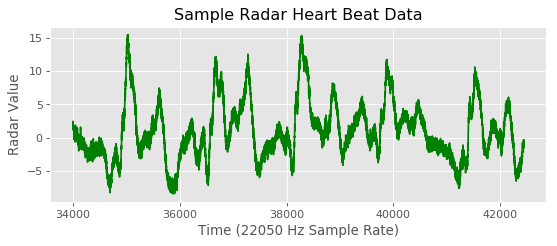

In [44]:
sample_rate = 22050

begin = 34000
end = sample_rate*4

# # Plotting Column 1
# plt.plot(kylebase['col1'][begin:end])
# plt.title('Column 1 of Kyle\'s Base Data')
# plt.xlabel('Time')
# plt.ylabel('Radar Value')

# plt.savefig(folder_path+'figures/'+'kyle_before_col1.png', dpi=300)

# plt.show()

# Plotting Column 2
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')

plt.plot(kylebase['col2'][begin:end] * -1 / 100, 'g')
plt.title('Sample Radar Heart Beat Data')
plt.xlabel('Time ({} Hz Sample Rate)'.format(sample_rate))
plt.ylabel('Radar Value')
plt.gcf().subplots_adjust(bottom=0.15)
# figure.set_yticks([35, 36, 38, 40, 42], minor = True)

plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=5)

plt.savefig(folder_path+'figures/'+'sample_plot.png', format='png', dpi=300)

plt.show()

# # Plotting Column 3
# plt.plot(kylebase['col3'][begin:end])
# plt.title('Column 3 of Kyle\'s Base Data')
# plt.xlabel('Time')
# plt.ylabel('Radar Value')

# plt.savefig(folder_path+'figures/'+'kyle_before_col3.png', dpi=300)

# plt.show()

# # Plotting Column 4
# plt.plot(kylebase['col4'][begin:end])
# plt.title('Column 4 of Kyle\'s Base Data')
# plt.xlabel('Time')
# plt.ylabel('Radar Value')

# plt.savefig(folder_path+'figures/'+'sample_radar.eps', dpi=300)

# plt.show()

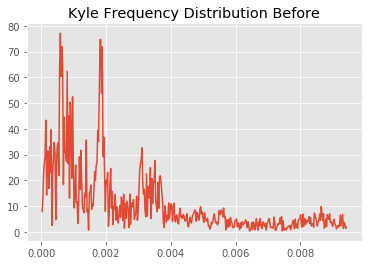

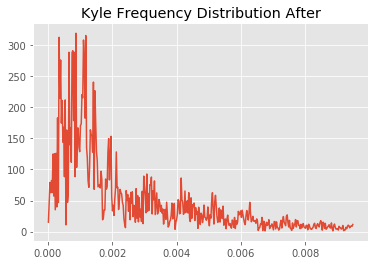

Length of before: 42447; Length of after: 42241


In [93]:
"""
=== Basic Fourier Analysis ===

Until a better understanding is obtained for the meaning of each of the 4 columns and the sample rate, the
exact meaning of the bands in terms of heart rate will remain unclear.

"""



fft_1 = np.fft.fft(kylebase['col2'].fillna(0))
fft_1_theo = 2.0*np.abs(fft_1/len(fft_1))

fft_freq = np.fft.fftfreq(len(fft_1))
mask = fft_freq > 0

fft_2 = np.fft.fft(kyleafter['col2'].fillna(0))
fft_2_theo = 2.0*np.abs(fft_2/len(fft_2))

fft_2_freq = np.fft.fftfreq(len(fft_2))
mask_2 = fft_2_freq > 0

# plt.plot(fft_1[len(fft_1)-400:])
plt.title('Kyle Frequency Distribution Before')
plt.plot(fft_freq[mask][:400], fft_1_theo[mask][:400])

plt.savefig(folder_path+'figures/'+'kyle_freq_before.png', dpi=300)

plt.show()

plt.title('Kyle Frequency Distribution After')
plt.plot(fft_2_freq[mask_2][:400], fft_2_theo[mask_2][:400])

plt.savefig(folder_path+'figures/'+'kyle_freq_after.png', dpi=300)

plt.show()

print('Length of before: {}; Length of after: {}'.format(len(kylebase['col2']), len(kyleafter['col2'])))